In [2]:
# Import local
from numpy.core.fromnumeric import argmax

# Import external libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# Get data to data frame
df = pd.read_csv("Banking Prediction Sample 1 - Dataset.csv", index_col = 'Customer_ID')

# Get first 5 row
print(f"First 5 rows:\n {df.head()}")

First 5 rows:
             Gender  Age  Tenure  Saving_Amount  Current_Amount  \
Customer_ID                                                      
1                M   52      49       0.000000        0.000000   
2                F   59      49       0.000000        0.000000   
3                M   52      49      18.825714        0.000000   
4                M   54      49       0.000000      603.791429   
5                F   61      49       0.000000        0.000000   

             Time_Deposits_Amount  Funds_Amount  Stocks_Amount  \
Customer_ID                                                      
1                             0.0           0.0            0.0   
2                             0.0           0.0            0.0   
3                             0.0           0.0            0.0   
4                             0.0           0.0            0.0   
5                             0.0           0.0            0.0   

             Bank_Assurance_Amount  Life_Assurance_Amount  

In [4]:
# Describe data
described_data = df.describe()
print(f"Described data:\n {described_data}")

Described data:
                  Age         Tenure  Saving_Amount  Current_Amount  \
count  104733.000000  104733.000000  104733.000000   104733.000000   
mean       45.285803      53.938453    1609.799590      323.738039   
std        15.540300      30.054760    7694.181205     2337.215922   
min        18.000000       0.000000       0.000000        0.000000   
25%        33.000000      33.000000       0.000000        0.000000   
50%        43.000000      55.000000      21.190000        0.000000   
75%        56.000000      71.000000     519.491429        0.000000   
max        90.000000     194.000000  820344.420000   162375.110000   

       Time_Deposits_Amount   Funds_Amount  Stocks_Amount  \
count          1.047330e+05  104733.000000   1.047330e+05   
mean           1.548830e+03     967.336721   6.179104e+02   
std            2.178448e+04    8716.537607   1.590660e+04   
min            0.000000e+00       0.000000   0.000000e+00   
25%            0.000000e+00       0.000000   0.

In [5]:
from data_preparation import (modifyData, changeToDummies, 
                        columns_to_boolean, printUniqueValues)

In [6]:
# Unique values
printUniqueValues(df)

Unique values
The number of values for feature Gender: 2 -- ['F' 'M']
The number of values for feature Age: 73
The number of values for feature Tenure: 174
The number of values for feature Saving_Amount: 58918
The number of values for feature Current_Amount: 22366
The number of values for feature Time_Deposits_Amount: 3444
The number of values for feature Funds_Amount: 5064
The number of values for feature Stocks_Amount: 7173
The number of values for feature Bank_Assurance_Amount: 3667
The number of values for feature Life_Assurance_Amount: 814
The number of values for feature Business_Loan_Amount: 2462
The number of values for feature Home_Loan_Amount: 4072
The number of values for feature Consumer_Loan_Amount: 23907
The number of values for feature Branch_Transactions: 144
The number of values for feature ATM_Transactions: 95
The number of values for feature Phone_Transactions: 21
The number of values for feature Internet_Transactions: 16
The number of values for feature Standing_Ord

In [7]:
# Check if there are any null values
null_values = df.isnull().sum()
print(f"Number of null values per column:\n {null_values}")

Number of null values per column:
 Gender                   0
Age                      0
Tenure                   0
Saving_Amount            0
Current_Amount           0
Time_Deposits_Amount     0
Funds_Amount             0
Stocks_Amount            0
Bank_Assurance_Amount    0
Life_Assurance_Amount    0
Business_Loan_Amount     0
Home_Loan_Amount         0
Consumer_Loan_Amount     0
Branch_Transactions      0
ATM_Transactions         0
Phone_Transactions       0
Internet_Transactions    0
Standing_Orders          0
New_Credit_Card_Flag     0
dtype: int64


In [8]:
# Get correlation matrix
correlation_matrix = df.corr()
print(f"Correlation matrix:\n {correlation_matrix}")

Correlation matrix:
                             Age    Tenure  Saving_Amount  Current_Amount  \
Age                    1.000000  0.276980       0.085108        0.019228   
Tenure                 0.276980  1.000000       0.066578        0.075896   
Saving_Amount          0.085108  0.066578       1.000000        0.023134   
Current_Amount         0.019228  0.075896       0.023134        1.000000   
Time_Deposits_Amount   0.060043  0.025367       0.173275        0.015273   
Funds_Amount           0.102992  0.054677       0.091285        0.023893   
Stocks_Amount          0.025087  0.027641       0.027650        0.010968   
Bank_Assurance_Amount  0.002291  0.026805       0.016550       -0.004637   
Life_Assurance_Amount -0.014322  0.000981       0.004775       -0.005297   
Business_Loan_Amount   0.000236  0.013352       0.026416        0.021965   
Home_Loan_Amount      -0.026403 -0.000991       0.043110       -0.003259   
Consumer_Loan_Amount  -0.060986 -0.151886      -0.056647       -0.0

In [9]:
# Get new data frame with modified data
# For more info see data_manipulation.py
df_new = modifyData(df)

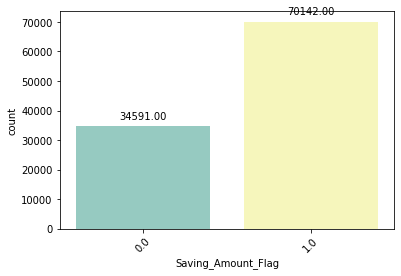

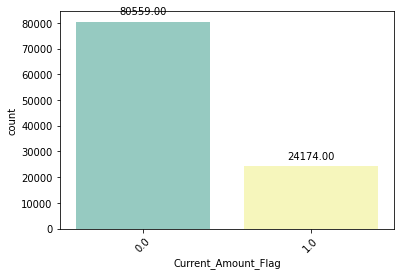

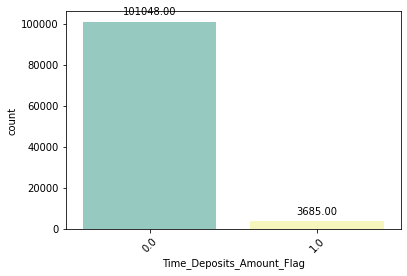

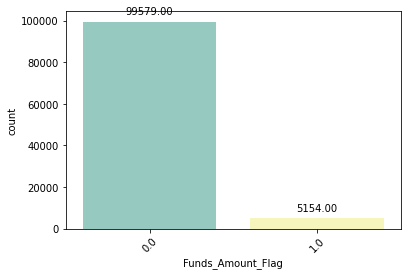

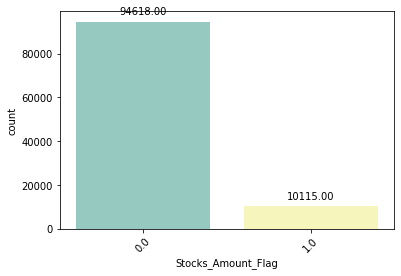

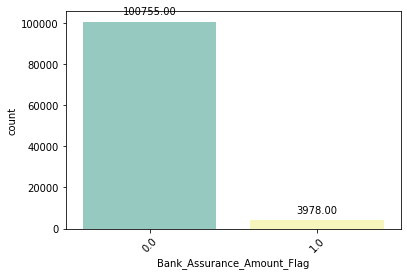

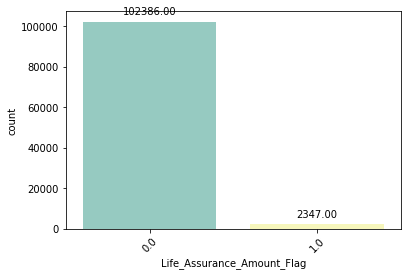

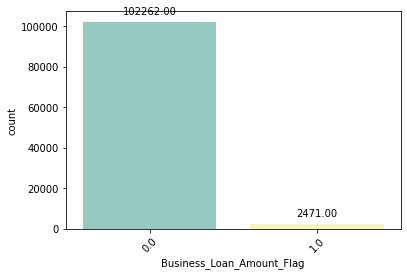

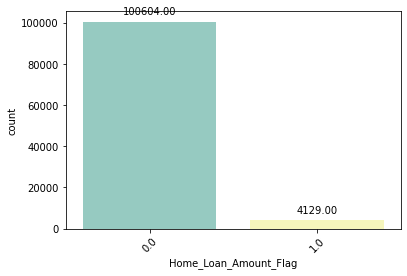

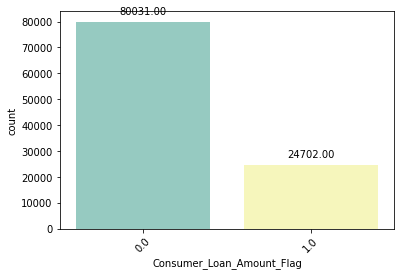

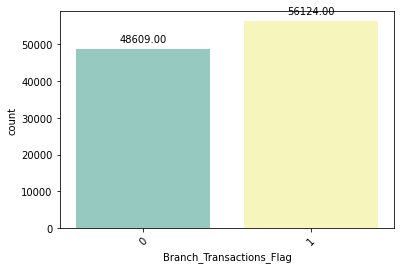

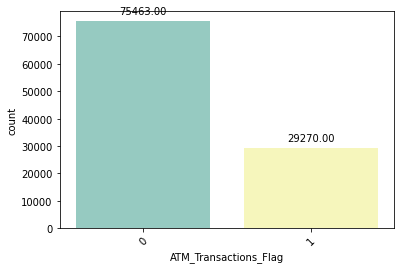

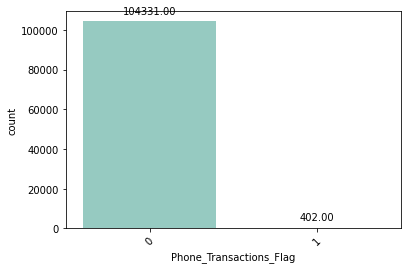

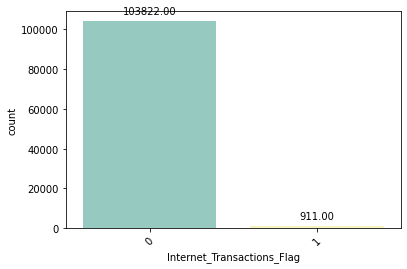

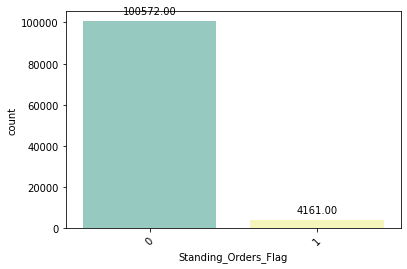

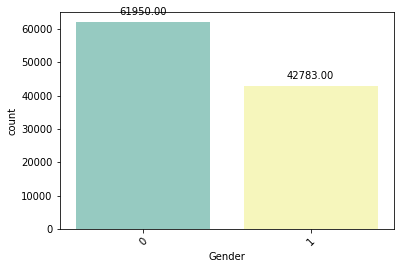

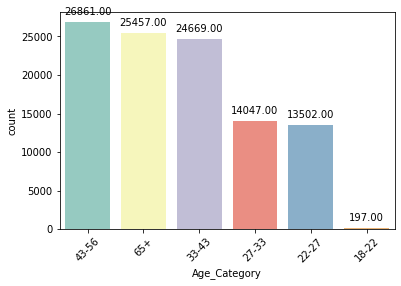

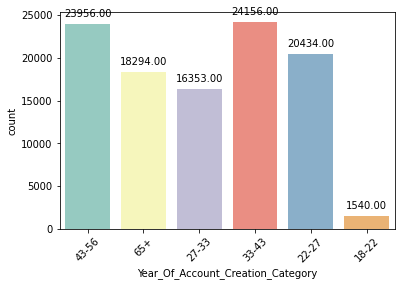

In [10]:
features = [f"{column}_Flag" for column in columns_to_boolean]
features.extend(["Gender", "Age_Category", "Year_Of_Account_Creation_Category"])

for feature in features:
    splot = sns.countplot(x=feature, data=df_new, palette="Set3")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    plt.xticks(rotation=45)
    plt.show()

In [11]:

df_new = changeToDummies(df_new)

# Create new data frame without New_Credit_Card_Flag column
df_x = df_new.drop(["New_Credit_Card_Flag"], axis=1)

# Create new data frame with only New_Credit_Card_Flag column
df_y = df_new["New_Credit_Card_Flag"]

In [12]:
# Split data into random train and test subsets (Cross validation)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.2)

In [13]:

from neural_network import build_neural_network

neural_network_model = build_neural_network(x_train, y_train)

Epoch 1/20
2619/2619 [==============================] - 3s 843us/step - loss: 0.2272 - accuracy: 0.9451
Epoch 2/20
2619/2619 [==============================] - 2s 880us/step - loss: 0.2146 - accuracy: 0.9454
Epoch 3/20
2619/2619 [==============================] - 2s 837us/step - loss: 0.2104 - accuracy: 0.9454
Epoch 4/20
2619/2619 [==============================] - 2s 697us/step - loss: 0.2075 - accuracy: 0.9454
Epoch 5/20
2619/2619 [==============================] - 2s 686us/step - loss: 0.2050 - accuracy: 0.9454
Epoch 6/20
2619/2619 [==============================] - 2s 704us/step - loss: 0.2018 - accuracy: 0.9454
Epoch 7/20
2619/2619 [==============================] - 2s 724us/step - loss: 0.2004 - accuracy: 0.9454
Epoch 8/20
2619/2619 [==============================] - 2s 714us/step - loss: 0.1985 - accuracy: 0.9454
Epoch 9/20
2619/2619 [==============================] - 2s 707us/step - loss: 0.1966 - accuracy: 0.9454
Epoch 10/20
2619/2619 [==============================] - 2s 889u

In [14]:
# Predict using trained model and test data
y_hat = neural_network_model.predict(x_test)

# Modify predicted values to either 0 or 1 depending if < 0.5 or not
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

# Calculate accuracy
neural_network_accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy score of neural network is {neural_network_accuracy}")

Accuracy score of neural network is 0.9415190719434764


In [15]:
from random_forest import build_random_forest, parse_first_tree


Accuracy score random forest is 0.9531197784885663
|--- feature_16 <= 0.50
|   |--- feature_18 <= 57.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_19 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_15 >  0.50
|   |   |   |   |   |--- feature_18 <= 19.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_18 >  19.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- feature_19 <= 2.50
|   |   |   |   |   |--- feature_27 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_27 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_19 >  2.50
|   |   |   |   |   |--- feature_2 <= 61.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 >  61.50
|

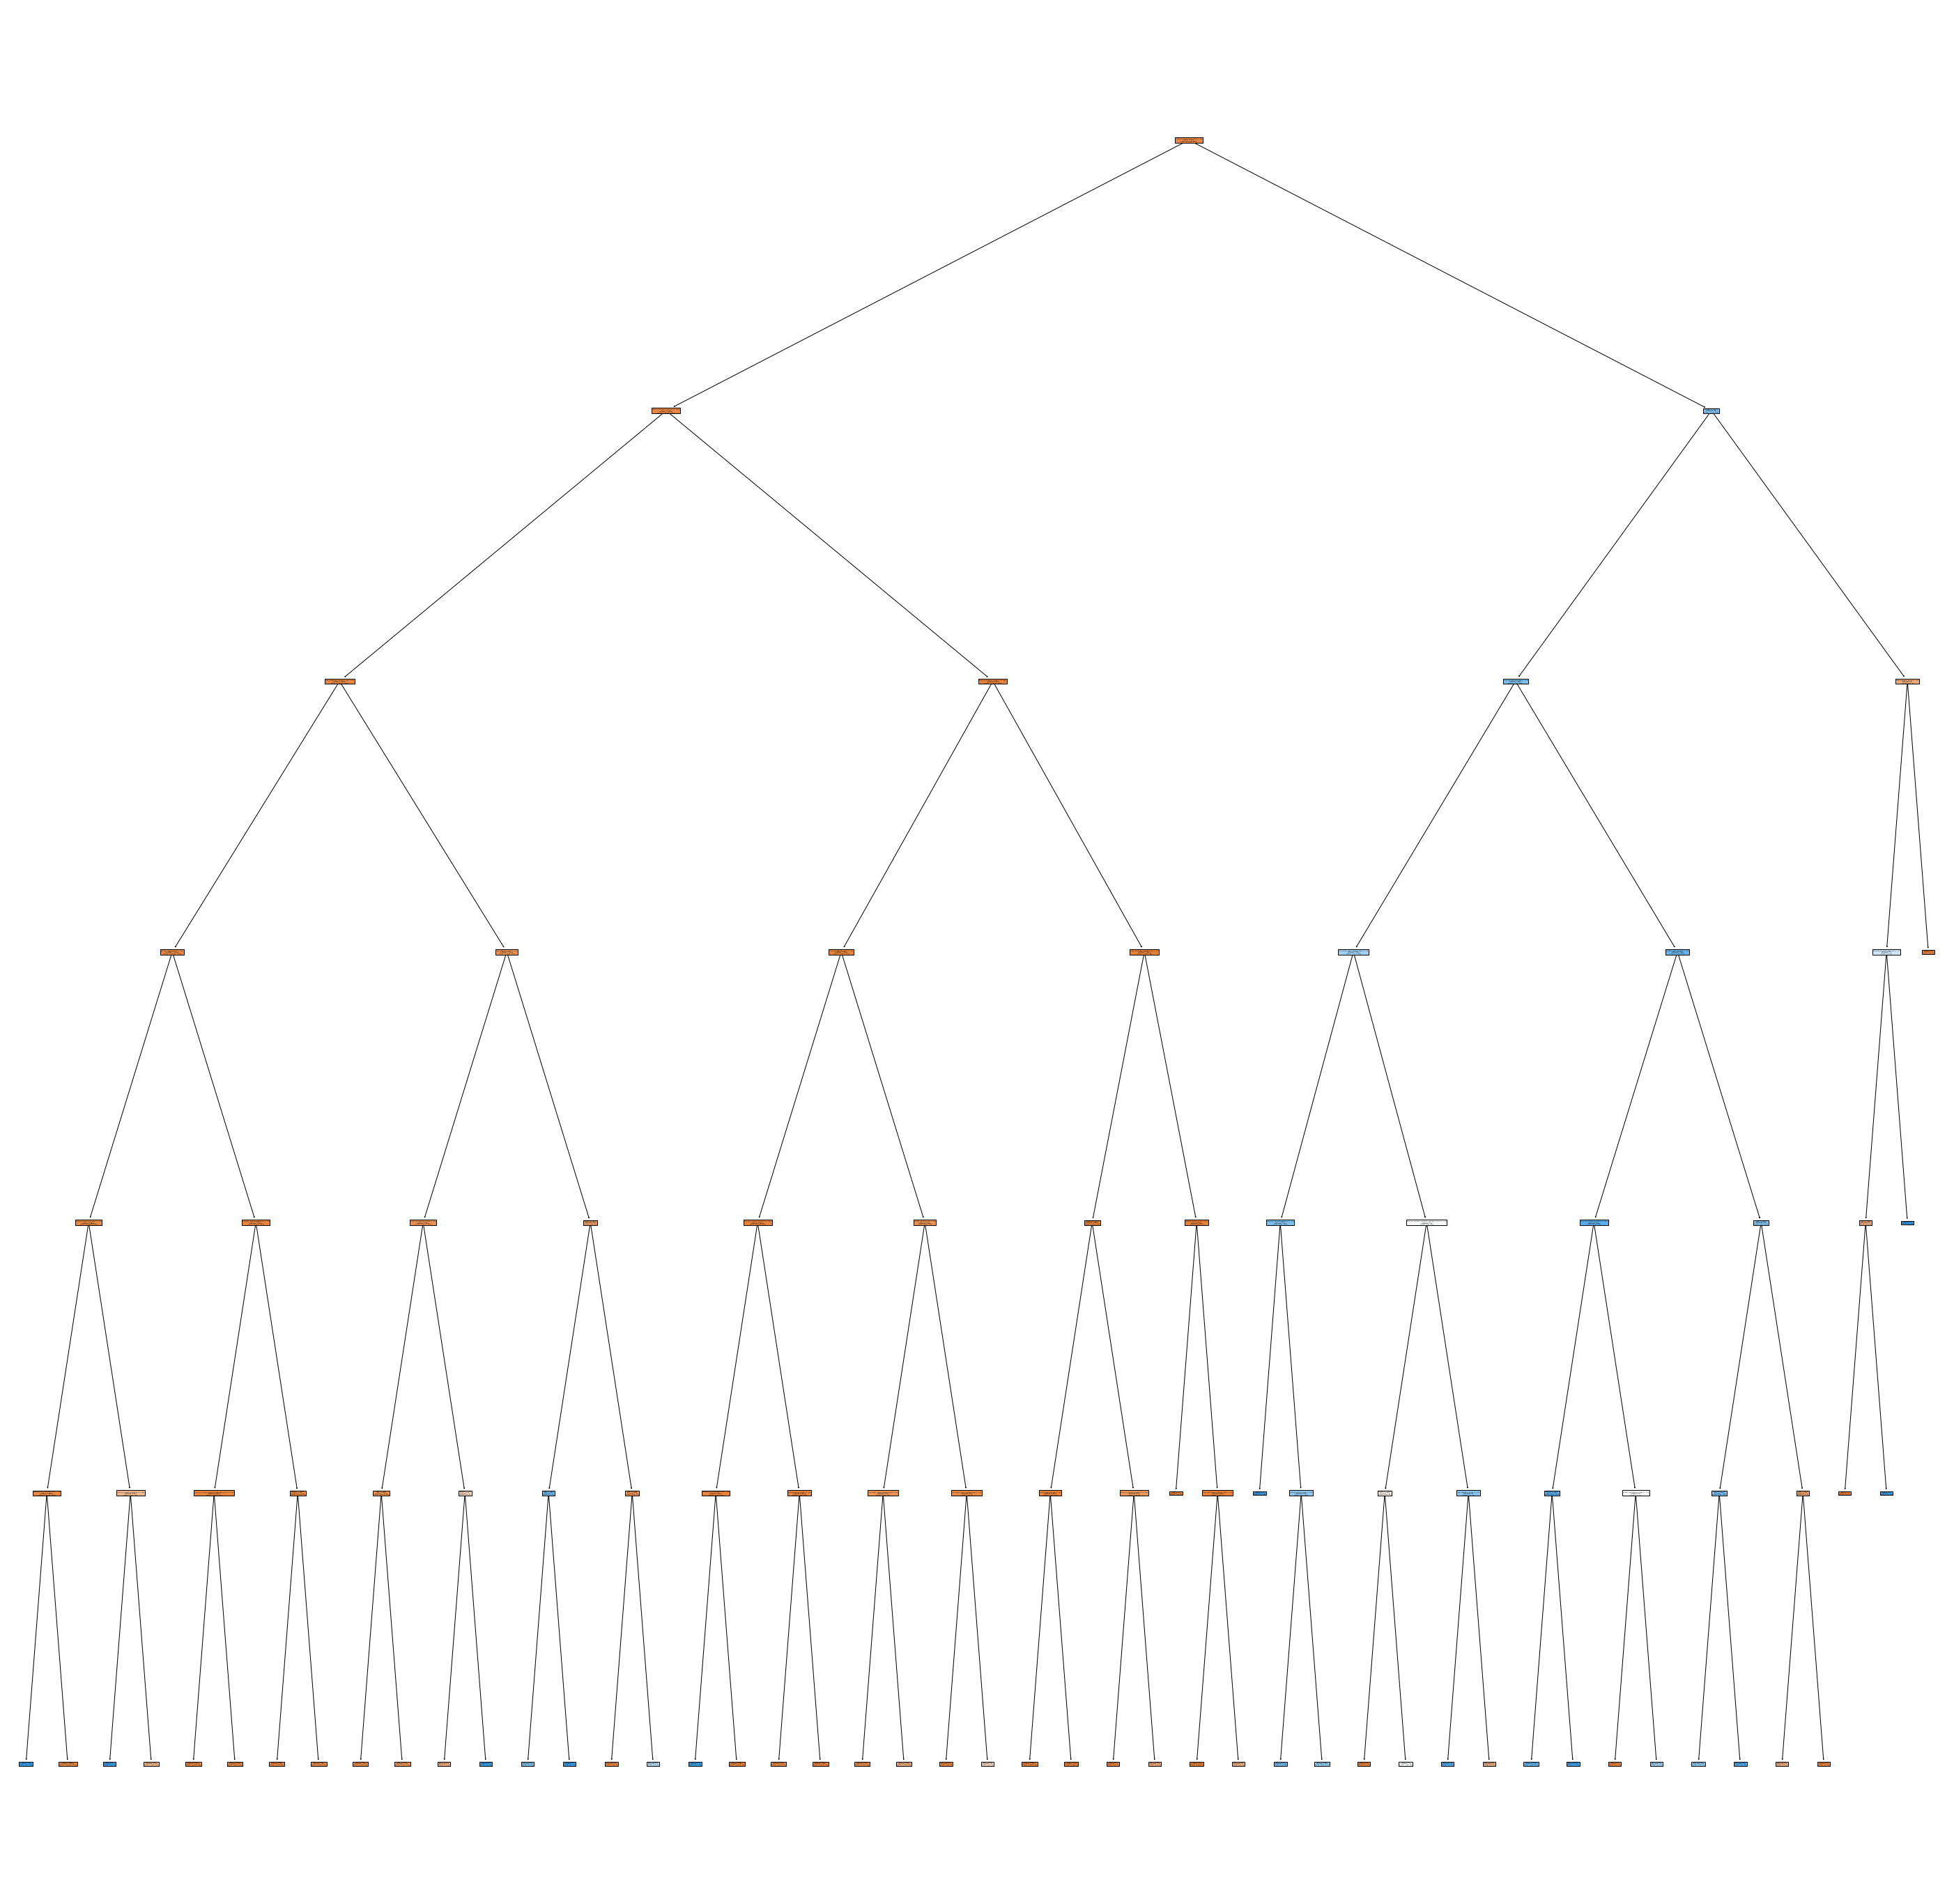

In [16]:
random_forest_model = build_random_forest(x_train, y_train)

y_hat = random_forest_model.predict(x_test)

random_forest_acurracy = accuracy_score(y_test, y_hat)
print(f"Accuracy score random forest is {random_forest_acurracy}")

parse_first_tree(random_forest_model, x_train.columns)

In [17]:
from kmeans_alg import cluster_optimization, kmeans_build

kmeans_data = df_new.values

In [18]:
kmeans_build(kmeans_data)

The clusters are: [1 1 1 ... 0 0 1]
The inertia is: 58603660.01431064
   Cluster 0  Cluster 1  Cluster 2
0      42877      31479      30377


Initializing check for optimal number of clusters
The innertia for : 2 Clusters is: 82108413.76428704
The innertia for : 3 Clusters is: 58603754.799312174
Difference in inertia between clusters: 23504658.964974865
The innertia for : 4 Clusters is: 39902898.670617074
Difference in inertia between clusters: 18700856.1286951
The innertia for : 5 Clusters is: 32621851.589268956
Difference in inertia between clusters: 7281047.081348117
The innertia for : 6 Clusters is: 28291555.454228777
Difference in inertia between clusters: 4330296.135040179
The innertia for : 7 Clusters is: 24267071.873777274
Difference in inertia between clusters: 4024483.5804515034
The innertia for : 8 Clusters is: 21391258.298267145
Difference in inertia between clusters: 2875813.5755101293
The innertia for : 9 Clusters is: 19170245.55011342
Difference in inertia between clusters: 2221012.748153724


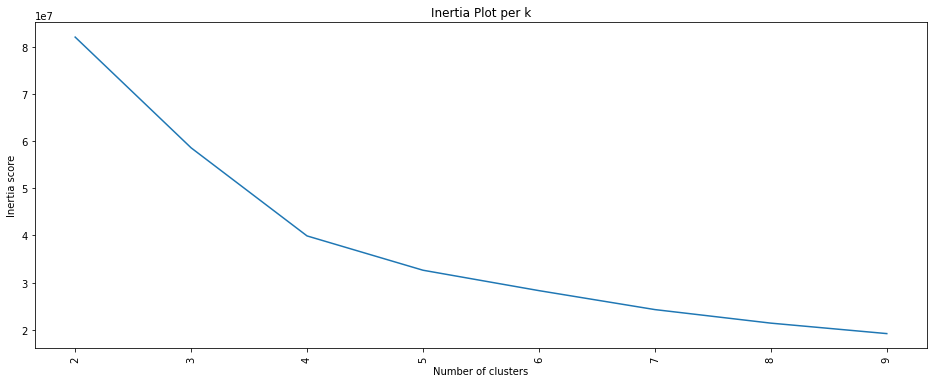

{3: 23504658.964974865, 4: 18700856.1286951, 5: 7281047.081348117, 6: 4330296.135040179, 7: 4024483.5804515034, 8: 2875813.5755101293, 9: 2221012.748153724}


In [19]:
cluster_optimization(kmeans_data)

In [20]:
from kmeans_alg import components_optimization

Number of components: 33
Total Variance in our dataset is:  1375.2549589823996
The 95% variance we want to have is:  1306.4922110332795

Variance explain with 1 n_compononets:  942.2245092466275
Variance explain with 2 n_compononets:  1371.7722770132561
Variance explain with 3 n_compononets:  1372.471288080967
Variance explain with 4 n_compononets:  1372.8532221024648
Variance explain with 5 n_compononets:  1373.1963089767946
Variance explain with 10 n_compononets:  1374.384461025218
Variance explain with 15 n_compononets:  1374.8925427643062
Variance explain with 20 n_compononets:  1375.1142599324633
Variance explain with 25 n_compononets:  1375.2230714335121
Variance explain with 30 n_compononets:  1375.2549589823996
Variance explain with 32 n_compononets:  1375.2549589823996


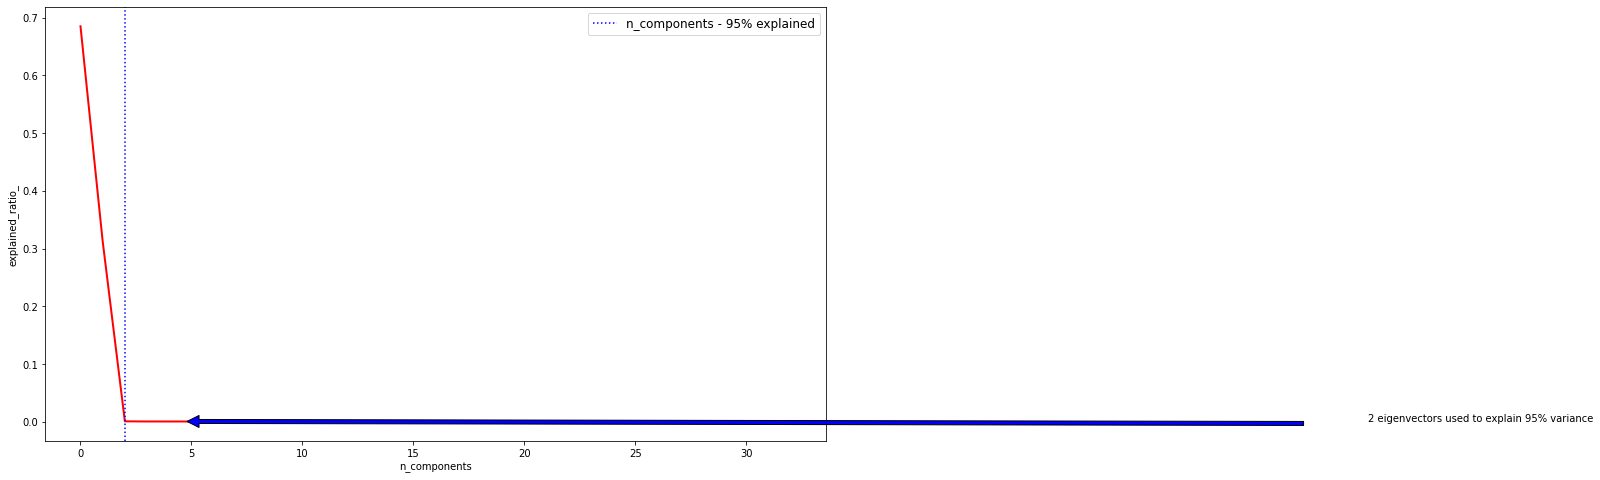

In [21]:
components_optimization(kmeans_data)

Initializing check for optimal number of clusters
The innertia for : 2 Clusters is: 81745650.26097888
The innertia for : 3 Clusters is: 58242281.21685922
Difference in inertia between clusters: 23503369.044119656
The innertia for : 4 Clusters is: 39542092.47689911
Difference in inertia between clusters: 18700188.73996011
The innertia for : 5 Clusters is: 32264696.990074545
Difference in inertia between clusters: 7277395.486824565
The innertia for : 6 Clusters is: 27937283.85978498
Difference in inertia between clusters: 4327413.130289566
The innertia for : 7 Clusters is: 23926836.749584235
Difference in inertia between clusters: 4010447.110200744
The innertia for : 8 Clusters is: 21049881.943532728
Difference in inertia between clusters: 2876954.8060515076
The innertia for : 9 Clusters is: 18835245.801062368
Difference in inertia between clusters: 2214636.14247036


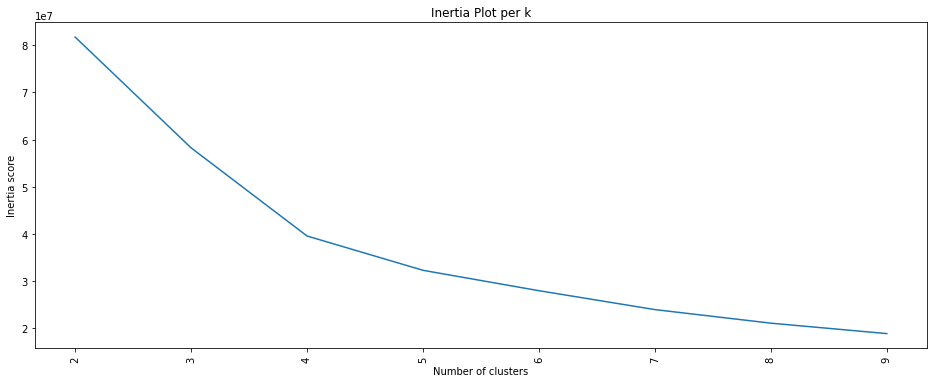

{3: 23503369.044119656, 4: 18700188.73996011, 5: 7277395.486824565, 6: 4327413.130289566, 7: 4010447.110200744, 8: 2876954.8060515076, 9: 2214636.14247036}


In [22]:
cluster_optimization(kmeans_data, 2)

In [23]:
kmeans_build(kmeans_data, 2, 3)

The clusters are: [2 2 2 ... 0 0 0]
The inertia is: 58242281.21685921
   Cluster 0  Cluster 1  Cluster 2
0      42652      30513      31568
